<a href="https://colab.research.google.com/github/itumor/colab/blob/master/Algorithmic_Trading_Strategy_Using_MACD_%26_Python_amz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
stock ='INTC'
startdate = '2019-1-01'
enddate = datetime.today().strftime('%Y-%m-%d')
investment = 1000

In [3]:
df = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,47.470001,45.770000,45.959999,47.080002,18774600.0,45.145596
2019-01-03,46.279999,44.389999,46.150002,44.490002,32267300.0,42.662006
2019-01-04,47.570000,45.540001,45.840000,47.220001,35447300.0,45.279839
2019-01-07,48.000000,46.750000,47.099998,47.439999,22736800.0,45.490799
2019-01-08,48.029999,46.779999,47.799999,47.740002,22749200.0,45.778473
...,...,...,...,...,...,...
2020-09-25,50.279999,48.750000,48.959999,49.939999,26633400.0,49.939999
2020-09-28,51.459999,50.160000,50.509998,51.430000,29652200.0,51.430000
2020-09-29,51.740002,50.950001,51.310001,51.189999,19558200.0,51.189999


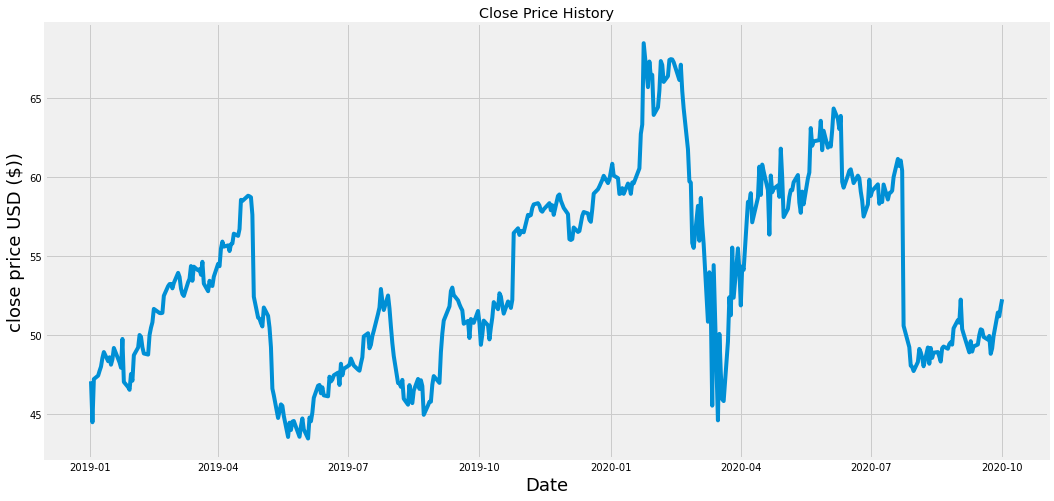

In [4]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($))', fontsize=18)
plt.show()

In [5]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

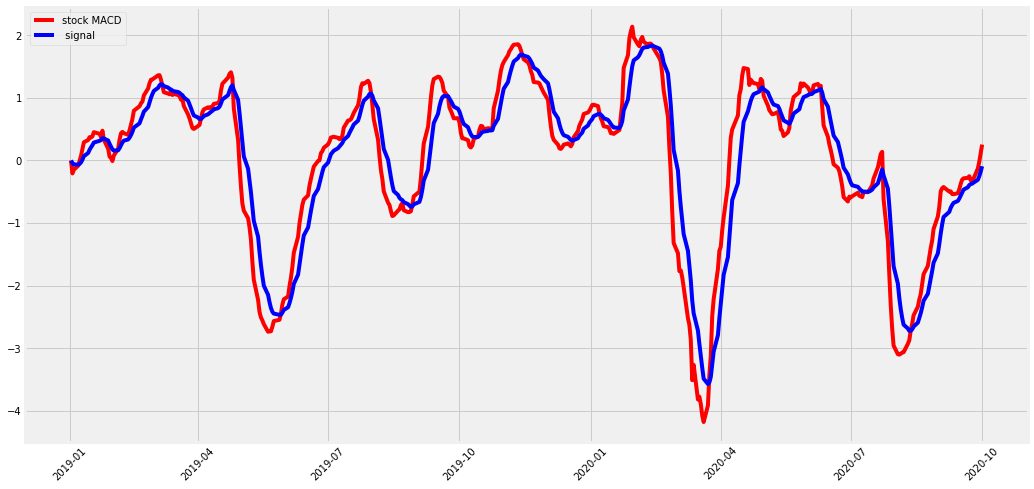

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df.index, MACD, label = 'stock MACD', color='red')
plt.plot(df.index, signal, label = ' signal', color='blue' )
plt.xticks(rotation = 45 )
plt.legend(loc='upper left')
plt.show()

In [7]:
df['MACD']  = MACD
df['signal'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,signal
Date,,,,,,,,
2019-01-02,47.470001,45.770000,45.959999,47.080002,18774600.0,45.145596,0.000000,0.000000
2019-01-03,46.279999,44.389999,46.150002,44.490002,32267300.0,42.662006,-0.206610,-0.041322
2019-01-04,47.570000,45.540001,45.840000,47.220001,35447300.0,45.279839,-0.148351,-0.062728
2019-01-07,48.000000,46.750000,47.099998,47.439999,22736800.0,45.490799,-0.083467,-0.066876
2019-01-08,48.029999,46.779999,47.799999,47.740002,22749200.0,45.778473,-0.007748,-0.055050
...,...,...,...,...,...,...,...,...
2020-09-25,50.279999,48.750000,48.959999,49.939999,26633400.0,49.939999,-0.288958,-0.353506
2020-09-28,51.459999,50.160000,50.509998,51.430000,29652200.0,51.430000,-0.128043,-0.308413
2020-09-29,51.740002,50.950001,51.310001,51.189999,19558200.0,51.189999,-0.019656,-0.250662


In [8]:
def buy_sell(signal):
   Buy = []
   Sell = []
   flag = -1

   for i in range(0, len(signal)):
     if signal['MACD'][i] > signal['signal'][i]:
       Sell.append(np.nan)
       if flag != 1:
         Buy.append(signal['Close'][i])
         flag = 1
       else:
           Buy.append(np.nan)
     elif signal['MACD'][i] < signal['signal'][i]:
       Buy.append(np.nan)
       if flag != 0:
         Sell.append(signal['Close'][i])
         flag = 0 
       else:
           Sell.append(np.nan)
     else:
       Buy.append(np.nan)
       Sell.append(np.nan)

   return (Buy, Sell)


In [9]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_signal_Price'] = a[1]



In [10]:
df


,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price
Date,,,,,,,,,,
2019-01-02,47.470001,45.770000,45.959999,47.080002,18774600.0,45.145596,0.000000,0.000000,NaN,NaN
2019-01-03,46.279999,44.389999,46.150002,44.490002,32267300.0,42.662006,-0.206610,-0.041322,NaN,44.490002
2019-01-04,47.570000,45.540001,45.840000,47.220001,35447300.0,45.279839,-0.148351,-0.062728,NaN,NaN
2019-01-07,48.000000,46.750000,47.099998,47.439999,22736800.0,45.490799,-0.083467,-0.066876,NaN,NaN
2019-01-08,48.029999,46.779999,47.799999,47.740002,22749200.0,45.778473,-0.007748,-0.055050,47.740002,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-25,50.279999,48.750000,48.959999,49.939999,26633400.0,49.939999,-0.288958,-0.353506,NaN,NaN
2020-09-28,51.459999,50.160000,50.509998,51.430000,29652200.0,51.430000,-0.128043,-0.308413,NaN,NaN
2020-09-29,51.740002,50.950001,51.310001,51.189999,19558200.0,51.189999,-0.019656,-0.250662,NaN,NaN


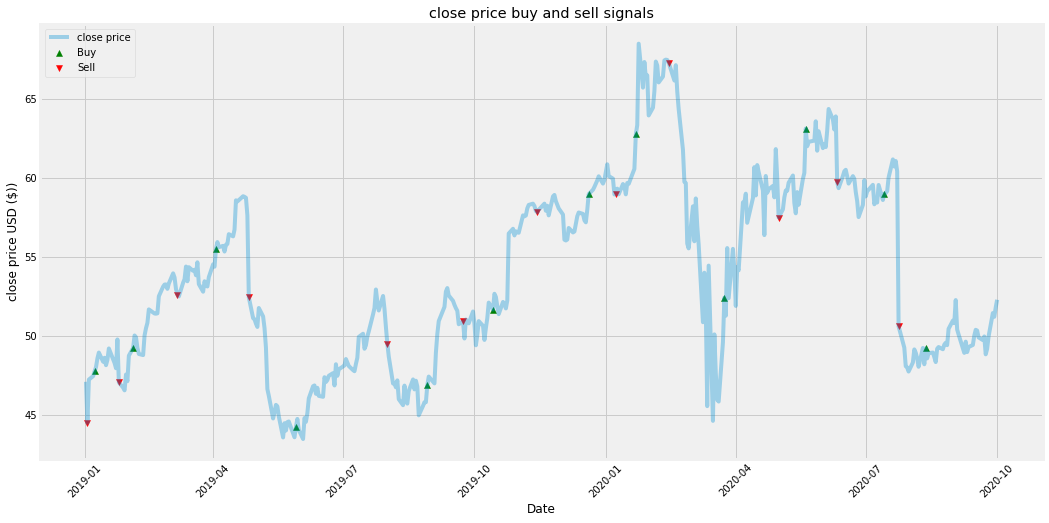

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1 )
plt.scatter(df.index, df['Sell_signal_Price'], color='red', label='Sell', marker='v' , alpha = 1 )
plt.plot(df['Close'],label='close price', alpha = 0.35)
plt.title('close price buy and sell signals')
plt.xlabel('Date')
plt.ylabel('close price USD ($))')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45 )
plt.show()

In [12]:
Buy_Signal_Price = df[df['Buy_Signal_Price'].notnull()]


Buy_Signal_Price['Buy_Sell'] = 'Buy'
Buy_Signal_Price.sort_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2019-01-08,48.029999,46.779999,47.799999,47.740002,22749200.0,45.778473,-0.007748,-0.055050,47.740002,NaN,Buy
2019-02-04,49.240002,48.240002,48.619999,49.220001,20905000.0,47.197662,0.188227,0.163239,49.220001,NaN,Buy
2019-04-03,55.990002,54.889999,55.029999,55.480000,24552800.0,53.537670,0.665950,0.662964,55.480000,NaN,Buy
2019-05-29,44.529999,43.330002,43.349998,44.230000,28450300.0,42.942917,-2.446412,-2.461630,44.230000,NaN,Buy
2019-08-29,47.220001,46.400002,46.459999,46.869999,17803800.0,45.813339,-0.706266,-0.733373,46.869999,NaN,Buy
2019-10-14,51.950001,51.439999,51.900002,51.639999,15016800.0,50.475800,0.382393,0.376204,51.639999,NaN,Buy
2019-12-20,59.049999,57.889999,58.320000,58.950001,49953000.0,57.938126,0.370225,0.326074,58.950001,NaN,Buy
2020-01-22,62.849998,60.970001,61.040001,62.730000,29475100.0,61.653240,0.704919,0.556451,62.730000,NaN,Buy
2020-03-24,54.639999,51.349998,53.139999,52.400002,50019800.0,51.754181,-3.435994,-3.543515,52.400002,NaN,Buy


In [13]:

Sell_signal_Price =  df[df['Sell_signal_Price'].notnull()]
Sell_signal_Price['Buy_Sell'] = 'Sell'                  

Sell_signal_Price.sort_index()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2019-01-03,46.279999,44.389999,46.150002,44.490002,32267300.0,42.662006,-0.206610,-0.041322,NaN,44.490002,Sell
2019-01-25,47.430000,45.750000,46.849998,47.040001,86455700.0,45.107239,0.332152,0.351595,NaN,47.040001,Sell
2019-03-07,52.990002,52.360001,52.770000,52.599998,17803000.0,50.758499,1.191728,1.213850,NaN,52.599998,Sell
2019-04-26,53.090000,51.520000,52.740002,52.430000,72364500.0,50.594452,0.829944,1.127657,NaN,52.430000,Sell
2019-08-01,51.889999,49.470001,50.520000,49.500000,34020800.0,48.059563,0.894488,1.034201,NaN,49.500000,Sell
2019-09-23,51.230000,50.389999,50.830002,50.900002,18916600.0,49.752491,1.017817,1.027357,NaN,50.900002,Sell
2019-11-14,58.040001,57.570000,57.610001,57.810001,12119000.0,56.817696,1.685240,1.691111,NaN,57.810001,Sell
2020-01-08,59.320000,58.520000,58.889999,58.970001,23133500.0,57.957787,0.673917,0.730675,NaN,58.970001,Sell
2020-02-14,67.860001,66.820000,67.519997,67.269997,13405500.0,66.440910,1.788836,1.825456,NaN,67.269997,Sell


In [31]:
 
 frames = [Sell_signal_Price, Buy_Signal_Price]
 frames

 result = pd.concat(frames)
 result

result = result.sort_index()
resultc =  result['Close'].to_numpy()


input = investment  


ns = 0 

 for index, row in  result.iterrows():
    if (row['Buy_Sell'] == 'Buy'):
      ns = input / row['Close']   
    else:
      if (ns == 0 ):
        print('x')
      else:
        input = ns * row['Close'] 


(input  - investment ) * 100 / investment 


x


29.273210707397492

In [15]:
(input - investment)

292.73210707397493

In [16]:
result

,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2019-01-03,46.279999,44.389999,46.150002,44.490002,32267300.0,42.662006,-0.206610,-0.041322,NaN,44.490002,Sell
2019-01-08,48.029999,46.779999,47.799999,47.740002,22749200.0,45.778473,-0.007748,-0.055050,47.740002,NaN,Buy
2019-01-25,47.430000,45.750000,46.849998,47.040001,86455700.0,45.107239,0.332152,0.351595,NaN,47.040001,Sell
2019-02-04,49.240002,48.240002,48.619999,49.220001,20905000.0,47.197662,0.188227,0.163239,49.220001,NaN,Buy
2019-03-07,52.990002,52.360001,52.770000,52.599998,17803000.0,50.758499,1.191728,1.213850,NaN,52.599998,Sell
2019-04-03,55.990002,54.889999,55.029999,55.480000,24552800.0,53.537670,0.665950,0.662964,55.480000,NaN,Buy
2019-04-26,53.090000,51.520000,52.740002,52.430000,72364500.0,50.594452,0.829944,1.127657,NaN,52.430000,Sell
2019-05-29,44.529999,43.330002,43.349998,44.230000,28450300.0,42.942917,-2.446412,-2.461630,44.230000,NaN,Buy
2019-08-01,51.889999,49.470001,50.520000,49.500000,34020800.0,48.059563,0.894488,1.034201,NaN,49.500000,Sell



Profit (P) = ( (SP * NS) - SC ) - ( (BP * NS) + BC )


#*



NS is the number of shares,

SP is the selling price per share,

BP is the buying price per share,

SC is the selling commission,

BC is the buying commission.

https://goodcalculators.com/stock-calculator/
© 2015-2020 goodcalculators.com

*/#

In [17]:
result

,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2019-01-03,46.279999,44.389999,46.150002,44.490002,32267300.0,42.662006,-0.206610,-0.041322,NaN,44.490002,Sell
2019-01-08,48.029999,46.779999,47.799999,47.740002,22749200.0,45.778473,-0.007748,-0.055050,47.740002,NaN,Buy
2019-01-25,47.430000,45.750000,46.849998,47.040001,86455700.0,45.107239,0.332152,0.351595,NaN,47.040001,Sell
2019-02-04,49.240002,48.240002,48.619999,49.220001,20905000.0,47.197662,0.188227,0.163239,49.220001,NaN,Buy
2019-03-07,52.990002,52.360001,52.770000,52.599998,17803000.0,50.758499,1.191728,1.213850,NaN,52.599998,Sell
2019-04-03,55.990002,54.889999,55.029999,55.480000,24552800.0,53.537670,0.665950,0.662964,55.480000,NaN,Buy
2019-04-26,53.090000,51.520000,52.740002,52.430000,72364500.0,50.594452,0.829944,1.127657,NaN,52.430000,Sell
2019-05-29,44.529999,43.330002,43.349998,44.230000,28450300.0,42.942917,-2.446412,-2.461630,44.230000,NaN,Buy
2019-08-01,51.889999,49.470001,50.520000,49.500000,34020800.0,48.059563,0.894488,1.034201,NaN,49.500000,Sell


In [18]:
Sell_signal_Pricef = df[df['Sell_signal_Price'].notnull()]['Sell_signal_Price']
Sell_signal_Pricef



Date
2019-01-03    44.490002
2019-01-25    47.040001
2019-03-07    52.599998
2019-04-26    52.430000
2019-08-01    49.500000
2019-09-23    50.900002
2019-11-14    57.810001
2020-01-08    58.970001
2020-02-14    67.269997
2020-05-01    57.470001
2020-06-11    59.700001
2020-07-24    50.590000
Name: Sell_signal_Price, dtype: float64

In [19]:
Buy_Signal_Pricef = df[df['Buy_Signal_Price'].notnull()] ['Buy_Signal_Price'] 
Buy_Signal_Pricef

Date
2019-01-08    47.740002
2019-02-04    49.220001
2019-04-03    55.480000
2019-05-29    44.230000
2019-08-29    46.869999
2019-10-14    51.639999
2019-12-20    58.950001
2020-01-22    62.730000
2020-03-24    52.400002
2020-05-20    63.099998
2020-07-14    58.980000
2020-08-12    49.189999
Name: Buy_Signal_Price, dtype: float64